<h1>UNAD</h1>
<h3>Eduar Yesid González Gómez</h3>
<h3>Arboles De Desición</h3> 


<h3> Pasos de la Actividad</h3>

<div> <p> 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</p></div>

<div> <p>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</p></div>

<div> <p>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</p></div>

<div> <p>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</p></div>

<div> <p>5. Entrenar el modelo configurando los diferentes hiperparámetros.</p></div>

<div> <p>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</p></div>

<div> <p>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</p></div>

<div> <p>8. Interpretar, analizar y documentar los resultados obtenidos.</p></div>

<div> <p>9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/.</p></div>

In [27]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [28]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
rawData = pd.DataFrame(pd.read_csv('./winequality-red.csv'))

In [30]:
rawData.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [31]:
rawData.shape

(1599, 12)

In [32]:
rawData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

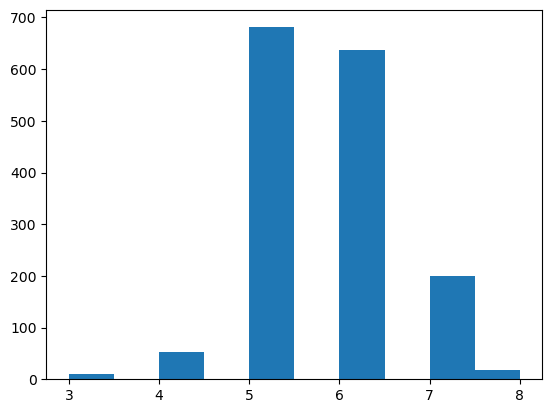

In [33]:
plt.hist(rawData.quality)

In [34]:
predictors_col = ["fixed acidity", "quality", "volatile acidity"]
target_col = ['alcohol']

In [35]:
predictors = rawData[predictors_col]
target = rawData[target_col]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [37]:
tree = DecisionTreeClassifier()

In [39]:
arbol = tree.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'